# MP 2: Gradient Descent, Nesterov and Pseudo-Inverse

## Overall Task

In this MP, you will learn about gradient descent and one of its variants, nesterov. You goal is to reconstruct a medical image from its measurements. The objective function you will use is the mean squared error. You are expected to use the aforementioned methods to optimize over this loss. The problem formulation proposed is the classic least squares and thus it does have an analytical solution using the pseudo-inverse. Please use the analytical pseudo-inverse to confirm your numerical solutions using gradient descent and nesterov. Finally, you will be asked and encouraged to explore the parameters for both gradient descent and nesterov to see how they affect convergence and convergence rates. 

**Do Not Use Existing Packages for Gradient Descent, Nesterov and Pseudo-Inverse you are expected to implement all of these yourself.**

## Background

### Problem Formulation

In this MP we will be dealing with a very common type of problem called a linear inverse problem. In this problem formulation, our image $x$ has been transformed by a matrix $A$ with the addition of some additive noise $n$ to create some measurements $b$, which we have access to. We do not have access to $x$ and thus our goal will be to recover our original image to the best of our ability. Using a mean squared error loss we have the following optimization problem:

$$\hat{x} = \text{argmin}_x \|Ax - b\|^2$$

where $\hat{x}$ is the reconstruction of $x$ which yields the lowest mean squared error loss for the above least squared problem.

### Gradient Descent

In calculus you learned about derivative, a function which gives the slope of line tangent to the curve of interest. In multivariate calculus, this was called a gradient and instead of a value, it was a vector which pointed in the direction of greatest ascent on a multidimensional curve. In optimization, we usually want to find the minimum of some multidimensional loss function. Thus, we want the direction of greatest descent, which happens to be the opposite direction of greatest ascent. This leads us to a simple yet commonly used algorithm unsurprisingly called (steepest) gradient descent.

Consider a loss function $f(x)$ which we want to minimize and is differentiable with respect to $x$. This gives us the following problem formulation:

$$\hat{x} = \text{argmin}_x f(x)$$

Then, to find the minumum of $f$ (assuming $f$ is convex) we will first randomly initialize $x$ and then over $n$ steps we will update $x$ as follows:

$$x_{i+1} = x_i - \alpha \nabla f(x_i)$$

where $x_{i+1}$ is the next step $x$ value, $x_i$ is the current step $x$ value, $\alpha$ is a parameter that controls the rate of descent (step size) and allows for the algorithm to converge and $\nabla f(x_i)$ is the gradient of $f$ at location $x_i$.

### Nesterov

There are many variations of gradient descent and one such example is gradient descent with nesterov momentum. The algorithm is described below:

$$v_{i+1} = \mu v_i - \alpha \nabla f(x_i + v_i)$$
$$x_{i+1} = x_i + v_{i+1}$$

where $\mu$ is the momentum parameter and $v$ is an intermediary variable which is constantly updated along with $x$ in order to keep track of the changing momentum when descending on $f$.

### Pseudo-Inverse

As discussed above, this problem takes the form:

$$\hat{x} = \text{argmin}_x \|Ax - b\|^2$$

This is the classic least squares problem and has an analytical solution thanks to the pseudo-inverse of $A$ called $A^{+}$. Thus, the solution is $x = A^{+} b$. The pseudo-inverse can be calculated in the following ways:

* If $A$ is full column rank then

$$A^{+} = (A^* A)^{-1} A^*$$
 
* If $A$ is full row rank then

$$A^{+} = A^*(A A^*)^{-1}$$

* If $A$ is both full column rank and full row rank then

$$A^{+} = A^{-1}$$

Where $A^*$ is the conjugate transpose of $A$. Make sure that the matrix $A$ you will use has either full row rank or full column rank otherwise these equations do not hold. The pseudo-inverse has a variety of wonderful properties and you are encouraged to read more about them online.

## Loading Data

Let's load the packages that we will need as well as the image we will try to reconstruct. Note that we will vectorize the two dimensional image in order to use matrix multiplication. Please put the appropriate directory in np.load to get the image. Depending on where you put the image the current code may not work.

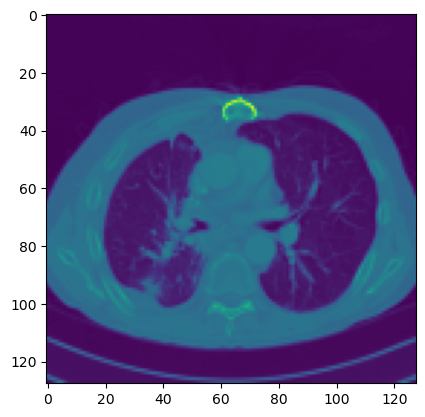

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

img = np.load(os.getcwd()+'/ct_image.npy') # put appropriate directory here

plt.figure(1)
plt.imshow(img)
plt.show()

img = img.flatten()
img = np.reshape(img, (img.shape[0],1))

## Creating the A Matrix

Now that we have our original image, we need to create our measurment matrix $A$ and our measurements $b$. Below you can find a a function which creates the $A$ matrix which is currently an identity matrix. This is a placeholder, feel free to change the arguments and internal workings of the function as you see fit to create your appropriate $A$ matrix.

In [2]:
####### PLEASE EDIT THIS #######

np.random.seed(27459161)
def create_A(dimension):
    #np.identity(dimension) # placeholder for now
    
    return np.random.normal(loc=0.0, scale = 1.0, size = (dimension,dimension))
# make sure A is either full row rank or full column rank

################################

A = create_A(np.shape(img)[0])
b = np.matmul(A,img) + np.random.normal(loc=0.0, scale = 1.0, size = (np.shape(A)[0],np.shape(img)[1]))

#print matrix shapes as a sanity check
print(np.shape(A), np.shape(b), img.shape)

(16384, 16384) (16384, 1) (16384, 1)


## Implementing Gradient Descent, Nesterov and the Pseudo-Inverse
Implement all the functions below. The main ones are gradient descent, nesterov and pseudo-inverse. Grad and mse are helper functions. Grad returns the gradient for the loss function with respect to the reconstructed image $x$ while mse returns the mean squared error between two matrices. Also note that the three main functions will be timed and compared. It is expected that nesterov and gradient descent are the quickest while the pseudo-inverse should take more time to complete. Also please make sure to keep track of the loss over the iterations in training.

**DO NOT USE EXISTING PACKAGES FOR THESE FUNCTIONS.**

loss function $f(x) = \text{argmin}_x \| Ax - b\|^2$

In [3]:
#Solve LS using GD, Nesterov and the pseudo-inverse
#compare results and times
import time
from timeit import Timer
import functools


def mse(a, b):
    return (np.square(np.subtract(a,b))).mean()

################################
 
def timer(func): 
    @functools.wraps(func)
    def wrapper_timer(*args):
        print('Timing {}...'.format(func.__name__))
        t1 = time.time()
        res = func(*args)
        t2 = time.time()
        print('Executing {}  takes {} units.'.format(func.__name__,  t2-t1))
        return res
    return wrapper_timer    



In [67]:
def grad(A, b, x):
    # return the gradient of the loss function with respect to the reconstructed image x 
    # gradient of f(x) = 2[(b-Ax)^T A]
    #np.multiply(np.matmul(np.transpose(np.subtract(b, np.matmul(A,x))), A), 2)
    
    return 2 * np.transpose(A @ x - b )
    

In [142]:

def GD(A, b, lr, iters, x0 = None, loss = None):
    '''
    A: a full row rank or full column rank measurement matrix
    b: the measured data
    lr: the learning rate or covergence rate to use
    iters: the number of iterations to do
    
    returns: x the reconstructed image data and loss the loss from each iteration with respect to the reconstructed image x
    
    f(x) is assumed to be a smooth, strongly convex function.
    '''

    # if x0 is not provided, randomly initialize it
    # else, set x to provided x0
    if x0 is None:
        # initialize x as an np.array with same number of rows as columns of A and same number of columns as number of columns of B
        np.random.seed(1723957)
        x = np.random.normal(loc=16, scale = 4, size = (A.shape[1],b.shape[1]))
    else:
        x = x0
    
    # if loss is not provided, initialize it as an empty list
    if loss is None:
        #keep track of loss
        loss = []

    # repeat for each iteration
    while len(loss) < iters:
        gradient = np.transpose(grad(A,b,x))
        step = np.multiply(lr, gradient)
        x = x - step
        
        # recalculate x as 
        # x - lr * gradient(f(x))^T
        #x_hat = np.subtract(x, np.multiply(np.transpose(grad(A,b,x)), lr)  )
        # use temporary variable so not to calculate twice
        temp = b - A @ x

        # calculate the loss and append to the list
        # loss = f(x)
        # loss = (Ax-b)^T(Ax-b)
        # select element [0][0] to remove the singleton element from the 2 dimensional array
        loss.append(np.dot(np.transpose(temp), temp)[0][0])

    return x, loss


In [39]:
@timer
def Nesterov(A, b, lr, m, iters):
    '''
    A: a full row rank or full column rank measurement matrix
    b: the measured data
    lr: the learning rate or covergence rate to use
    m: momentum parameter
    iters: the number of iterations to do
    
    returns: x the reconstructed image data and loss the loss from each iteration with respect to the reconstructed image x
    
    f(x) is assumed to be a smooth, strongly convex function.
    '''

    #initialize x, v
    x = np.zeros((A.shape[1],b.shape[1]))
    v = np.zeros((A.shape[1],b.shape[1]))
    
    #keep track of loss
    losstrack = []

    ####### PLEASE EDIT THIS #######
    
    while len(loss) < iters:
        gradient = grad(A,x,b)
        v = np.add(np.multiply(m,v) , np.multiply(lr,np.transpose(grad(A,x,b))))
        x = np.subtract(x, np.multiply(lr,v))
        temp = A@x-b
        losstrack.append(np.matmul(np.transpose(temp), temp)[0][0])
    
    ################################


    return x, loss

In [9]:
@timer
def pseudo_inverse(A, b):
    
    if (A.shape[0] == A.shape[1]):
        Aplus = np.linalg.inv(A)
    elif (A.shape[0] > A.shape[1]):
        # wide matrix
        Aplus = np.transpose(A) @ np.linalg.inv(A @ np.transpose(A))
    else:
        # tall matrix
        Aplus = np.linalg.inv(np.transpose(A) @ A) @ A

    return Aplus@b

Now that you have implemented the functions above, play around with the parameters for gradient descent and nesterov in order to: 1) find which parameters lead to a converging result, and 2) find parameters which lead to a solution with a low MSE in less time than the pseudo-inverse. Also modify the parameters (especially the momentum parameter for nesterov) to see how quickly you can get the two algorithms to converge to low MSE results. Show your resulting solutions.

In [135]:
keep_goin = True
alpha = 0.1
iters = 2
while keep_goin == True:
    gd_out, gd_loss = GD(A, b, alpha, iters)
    if gd_loss[1] < gd_loss[0]:
            keep_goin = False
    else:
        alpha = alpha / 2


print(f'Converging alpha value: {alpha}')
print("GD Done")
print(f'MSE from Gradient Descent: {mse(gd_out, img)}')

Timing GD...
Executing GD  takes 0.2878258228302002 units.
Timing GD...
Executing GD  takes 0.28263354301452637 units.
Timing GD...
Executing GD  takes 0.28333401679992676 units.
Timing GD...
Executing GD  takes 0.2826066017150879 units.
Timing GD...
Executing GD  takes 0.28270840644836426 units.
Timing GD...
Executing GD  takes 0.2717866897583008 units.
Timing GD...
Executing GD  takes 0.3115837574005127 units.
Timing GD...
Executing GD  takes 0.28339076042175293 units.
Timing GD...
Executing GD  takes 0.2831737995147705 units.
Timing GD...
Executing GD  takes 0.28322553634643555 units.
Timing GD...
Executing GD  takes 0.26691460609436035 units.
Timing GD...
Executing GD  takes 0.28292107582092285 units.
Converging alpha value: 4.8828125e-05
GD Done
MSE from Gradient Descent: 523442.99487772404


In [145]:

keep_goin = True
iters = 2
pseudo_sol_mse = mse(pseudo_sol, img)
mse_out = mse(gd_out, img)
this_time = 0
pseudo_time = 81.43
t = time.time()
while keep_goin == True:
    if mse_out > pseudo_sol_mse:
        if this_time > pseudo_time:
            alpha = alpha /2
            print(f'Decreasing alpha to: {alpha}')
            iters = 2
            t = time.time()
            keep_goin = False
        iters = iters*2
        gd_out, gd_loss = GD(A, b, alpha, iters, gd_out, gd_loss)
        this_time = time.time() - t
        
        print(f'MSE with alpha {alpha} and {iters} iterations: {mse_out} \n Execution takes {this_time} units. ')
        
        mse_out = mse(gd_out, img)
    else:
        keep_goin = False
        

MSE with alpha 4.8828125e-05 and 4 iterations: 2.987308224971648e+48 
 Execution takes 0.0 units. 
MSE with alpha 4.8828125e-05 and 8 iterations: 2.987308224971648e+48 
 Execution takes 0.0 units. 
MSE with alpha 4.8828125e-05 and 16 iterations: 2.987308224971648e+48 
 Execution takes 0.0 units. 
MSE with alpha 4.8828125e-05 and 32 iterations: 2.987308224971648e+48 
 Execution takes 0.0 units. 
MSE with alpha 4.8828125e-05 and 64 iterations: 2.987308224971648e+48 
 Execution takes 0.0 units. 
MSE with alpha 4.8828125e-05 and 128 iterations: 2.987308224971648e+48 
 Execution takes 0.0 units. 
MSE with alpha 4.8828125e-05 and 256 iterations: 2.987308224971648e+48 
 Execution takes 0.0 units. 
MSE with alpha 4.8828125e-05 and 512 iterations: 2.987308224971648e+48 
 Execution takes 0.0 units. 
MSE with alpha 4.8828125e-05 and 1024 iterations: 2.987308224971648e+48 
 Execution takes 0.0 units. 
MSE with alpha 4.8828125e-05 and 2048 iterations: 2.987308224971648e+48 
 Execution takes 0.0 uni

KeyboardInterrupt: 

In [55]:
alpha = 0.001
iters = 10
momentum = 0.1
nest_out, nest_loss = Nesterov(A, b, alpha,momentum,  iters)
print("Nesterov Done")
print(f'MSE from Nesterov Descent: {mse(nest_out, img)}')

Timing Nesterov...


TypeError: object of type 'function' has no len()

In [10]:
pseudo_sol = pseudo_inverse(A,b)
print("Pseudo Inverse Done")
print(f'MSE from Pseudoinverse: {mse(pseudo_sol, img)}')

Timing pseudo_inverse...
Executing pseudo_inverse  takes 81.31272411346436 units.
Pseudo Inverse Done
MSE from Pseudoinverse: 54.43086319298106


In [74]:
pseudo_sol.shape

#check_psol = np.linalg.pinv(A)@b

(16384, 1)

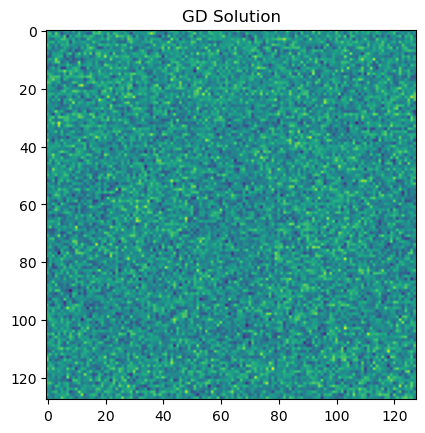

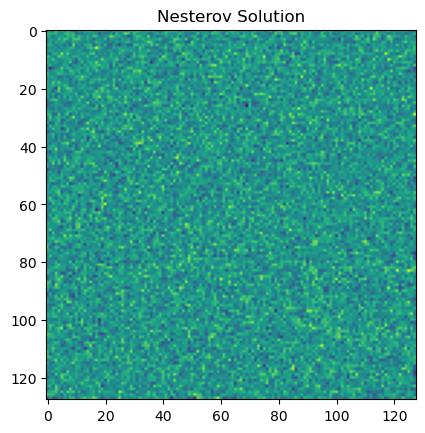

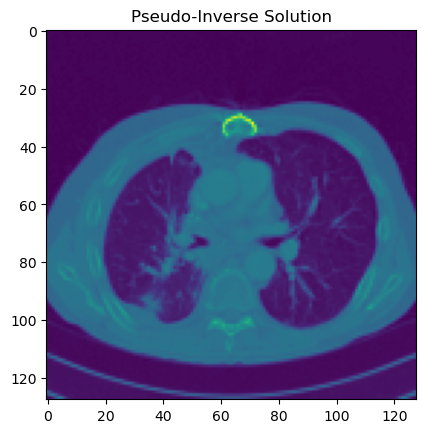

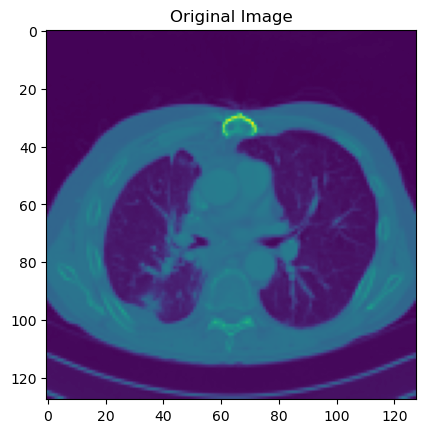

In [14]:
plt.figure(1)
plt.title('GD Solution')
plt.imshow(np.reshape(gd_out,(128,128)))
plt.show()

plt.figure(2)
plt.title('Nesterov Solution')
plt.imshow(np.reshape(nest_out, (128,128)))
plt.show()

plt.figure(3)
plt.title('Pseudo-Inverse Solution')
plt.imshow(np.reshape(pseudo_sol, (128,128)))
plt.show()

plt.figure(4)
plt.title('Original Image')
plt.imshow(np.reshape(img, (128,128)))
plt.show()

## Plotting the Loss Curves

Plot the resulting loss curves for nesterov and gradient descent. Try several different parameter combinations and plot those too.

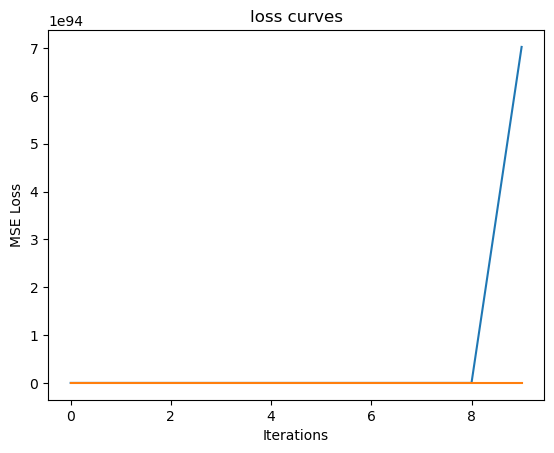

In [36]:
plt.figure(1)
plt.title('loss curves')
plt.plot(gd_loss, label='GD Loss')
plt.plot(nest_loss, label='Nesterov Loss')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.show()

## Question Time

Finally, write a few sentences discussing how the learning rate and momentum affect the convergence rate: 1) Do the algorithms always converge to a good solution? 2) In practice, when would we want to use the pseudo-inverse over gradient descent and nesterov? 3) When would we want to use gradient descent and nesterov over the pseudo-inverse? 

Please put your answers in the markdown cell below.

**Answers:** 